### Link to dataset
https://www.kaggle.com/snap/amazon-fine-food-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect('database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [4]:
df = pd.read_sql_query('SELECT * FROM Reviews',con)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

In [7]:
!pip install TextBlob

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
from textblob import TextBlob

In [10]:
polarity = []

for i in df["Summary"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [12]:
for i in range(100):
    print(polarity[i])

0.7
0.0
0.0
0.0
0.8
0.6
0.35833333333333334
1.0
0.0
0.5
0.625
0.3333333333333333
0.13636363636363635
0.375
0.0
0.0
-0.4
0.625
0.61875
0.0
0.3
0.0
1.0
0.0
0.0
0.0
-1.0
0.8
0.0
0.625
1.0
0.0
0.5
0.35
0.4
0.5
0.640625
0.0
0.7
0.5
1.0
0.0
0.0
0.475
0.8
0.0
0.7
0.0
0.45499999999999996
0.0
0.0
0.4375
0.0
0.0
0.4
0.625
1.0
-0.625
0.875
0.8
0.5
-0.125
-0.5
0.0
0.8
0.8
0.0
0.7
0.2
0.0
1.0
-0.0625
1.0
0.0
0.35714285714285715
0.0
0.7
0.8
-0.3
1.0
1.0
0.8
0.0
0.1
0.0
1.0
0.8
1.0
0.625
0.8
0.45
0.8
0.7
1.0
0.0
0.6
0.8
0.4666666666666666
0.5
-0.6999999999999998


In [13]:
len(polarity)

568454

In [14]:
data = df.copy()

In [15]:
data["Polarity"] = polarity

In [16]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [17]:
data_positive = data[data["Polarity"]>0]

In [18]:
data_positive.shape

(331665, 11)

In [20]:
!pip3 install wordcloud

    100% |████████████████████████████████| 368kB 369kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/89/d2/942af29f8494a1a3f4bc4f483d520f7c02ccae677f5f50cf76c6b3d827d8/Pillow-8.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e2

In [25]:
from wordcloud import WordCloud,STOPWORDS

In [26]:
stopwords = set(STOPWORDS)

In [27]:
print(stopwords)

{"you'll", 'we', "weren't", 'doing', "he'd", 'if', 'once', 'this', 'hers', 'otherwise', 'since', 'like', 'same', 'theirs', 'get', 'being', 'my', 'up', 'of', 'about', 'com', 'did', "wasn't", 'a', 'below', 'have', "that's", "they've", 'but', 'why', 'should', "i've", 'as', 'me', 'themselves', 'yours', "haven't", 'your', "you'd", "aren't", 'himself', 'ought', "what's", 'them', 'each', "didn't", 'i', 'more', 'him', 'you', 'k', 'ever', 'is', "she'd", 'very', "he'll", "how's", 'http', 'nor', 'our', "hadn't", 'yourself', "they'd", 'out', 'these', 'an', 'some', 'further', "i'll", 'the', 'were', 'in', 'into', 'myself', 'all', 'on', "doesn't", 'then', "i'd", 'shall', 'few', "let's", 'only', "you've", 'when', 'else', 'www', 'also', 'not', "here's", "it's", 'against', "can't", 'at', 'than', 'those', 'or', 'over', 'be', 'been', 'just', "couldn't", 'that', 'again', 'there', 'would', 'most', 'after', 'could', 'while', 'own', "won't", "there's", 'ourselves', 'therefore', 'hence', 'above', 'no', 'betwee

In [28]:
total_text = (' '.join(data_positive["Summary"]))

In [29]:
len(total_text)

8465012

In [31]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [32]:
import re
total_text = re.sub('[^a-zA-Z]',' ',total_text)

In [33]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [34]:
total_text = re.sub(' +',' ',total_text)

In [35]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

In [36]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)

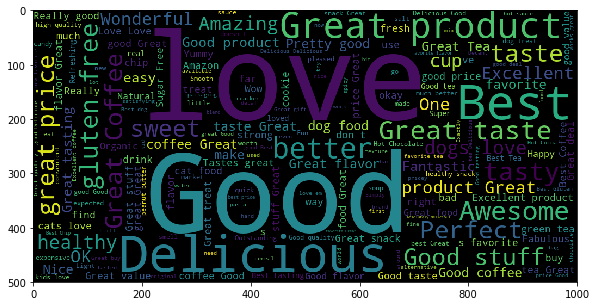

In [37]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)